In [5]:
from functools import partial
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap
from collections import defaultdict
import matplotlib.gridspec as gridspec
import numpy as np


import estaudel.escaffolding as escaffolding
import estaudel.stochastic as stochastic
import estaudel.heredity.process as ehp
import estaudel.heredity.deterministic as ehd
import estaudel.heredity.stochastic as ehs
import estaudel.heredity.display 

panel_dict = dict(xy=(1, 1), xycoords="axes fraction",
           ha='center', va='center',
            bbox=dict(boxstyle="round",
               ec=(.1, 0.1, .1),
               fc=(1., 1, 1),
           ))

In [6]:
path = 'cont_20190425_084340_continue"full.pkle"_NPROC8_N1000_selection"neutral".pkle'

In [7]:
data = escaffolding.load(path)

In [8]:
for d in [data]:
    print(d)
    print("\n".join(["{}: {}".format(k,v) for k,v in sorted(d.parameters.items())]))
    print('-'*80)

Ecological scaffolding data 999 generations
B: 15
D: 1000
N: 1000
NPROC: 8
T: 1
carrying_capacity: 1500
collectiveSelectionStrength: 1
continue: full.pkle
goal: 0.5
initial_type0: (0, 6, 0.8, 0.15)
initial_type1: (1, 4, 0.3, 0.15)
max_types: 4
mutation_effect: {1: 0.1, 3: 0.1}
mutation_rate: 1
name: cont
percentile: 20
selection: neutral
skip: 100
steps: 100
--------------------------------------------------------------------------------


In [9]:
path_selection = "out/full_trajectory.321.1_20180629_163801_selection\"rank\"_NPROC8.pkle"
data_s =  escaffolding.load(path_selection)

(0, 300)

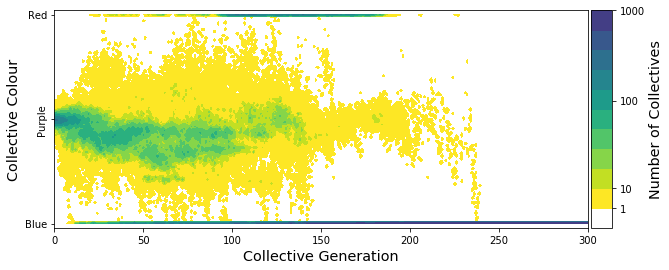

In [14]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
estaudel.heredity.display.plot_density(data, ax=ax, colorbar=True)
ax.set_xlim(0,300)

In [ ]:
## Alternative below:
# Adding the end of the previous. 

In [76]:
def plot_density(out, before):
    g = 100
    fig = plt.figure(figsize=(10,4))
    ax = plt.gca()
    g
    cp2 = before.data['cp_density'] * before.parameters['D'] 
    cp_density = out.data['cp_density'] * out.parameters['D']  
    cp_density = np.hstack([cp2[:,-g:], cp_density])
    zbin_cp = [-100,1]+list(np.logspace(1,np.log10(out.parameters['D']),10,base=10))
    cm = np.array([(0,0,0,0)] + list(plt.cm.viridis_r(np.linspace(0,1,len(zbin_cp)))))

    im = ax.contourf(cp_density,
                    extent=[0,cp_density.shape[1],0,1],
                    levels=zbin_cp,
                    colors=cm
                    )

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="4%", pad=0.05)
    tk =  [1,10,100,1000]
    cbar = fig.colorbar(im, 
                        spacing='uniform',
                        cax=cax, 
                        ticks=tk,
                        label='Number of Collectives')
    cbar.ax.set_yticklabels([x if x>0 else 0 for x in tk]) 
    ax.set(xlabel='Collective Generation',
           ylabel='Collective Phenotype')
    ax.set_xlim(0,g+300)
    ticks = [0,g,g+100,g+200,g+300]
    ax.set_xticks(ticks)
    ax.set_xticklabels([t-g for t in ticks])
    return fig, ax

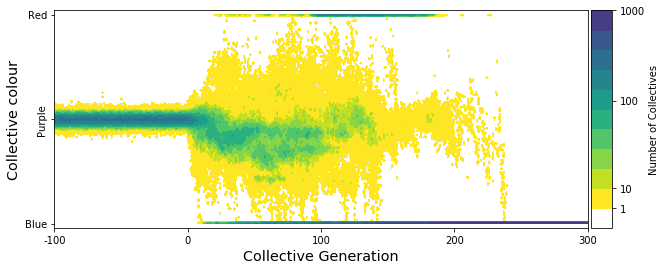

In [79]:
ylabel_font = fontdict={'fontweight': 'normal', 'size':'x-large'}

fig, ax = plot_density(data, data_s)
ticks = ax.set(ylim=(1.02,-.02), yticklabels=['Blue','Purple','Red'], yticks=[1,0.5,0])
plt.setp(ticks[1][1], rotation= 90, horizontalalignment='right',  verticalalignment='center')
ax.set_ylabel('Collective colour', fontdict=ylabel_font)
ax.set_xlabel('Collective Generation',fontdict=ylabel_font)
fig.savefig('lifting_selection.png')